# Is your Time Series a random walk ?

Refs: 
https://otexts.com/fpp2/wn.html  
Machine Learning Mastery Jason Brownlee


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller

from random import randrange, random
from random import seed 

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
# Some basic settings, shall we. 
sns.set(rc={'figure.figsize':(25,10)}) # figure sizes
sns.set_style("whitegrid") # setting the style 

## Definition of a random walk

A sequence of numbers where every value is determined by the previous value alone , and there is no informative signal in the past to help you predict the future. 

***

## Why is it important?

### Helps to determine if your TS (data) is predictable, is ur target worth forecasting ?

* If your TS is a random walk, it is going to be difficult to predict 
* It will decide the choice of ML models you use to model a TS that resembles a random walk.


## Characteristics of a random walk.

Should have : 
    
1. First-order diff is White noise 
2. will show strong correlation with the previous value and a almost linear tapering off with previous lag values.   
3. Rejected Null Hypothesis in the ADF Test.

In [4]:
# real data 
daily_temps = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, squeeze=True, parse_dates=True)
shampoo_sales = pd.read_csv('shampoo-sales.csv', header=0, index_col=0, squeeze=True, parse_dates=True)
sunspots = pd.read_csv('sunspots.csv', parse_dates=True, dayfirst=False, index_col=0)

In [5]:
# Synthetic random walk (we will check our data against this)

## current_value = drift + (some weight) * previous_value + noise 

<font size = 5 > $X_{t}$  = $B_{0}$ + $B_{1}$ * $X_{t - 1}$ + $e_{t}$  </font>


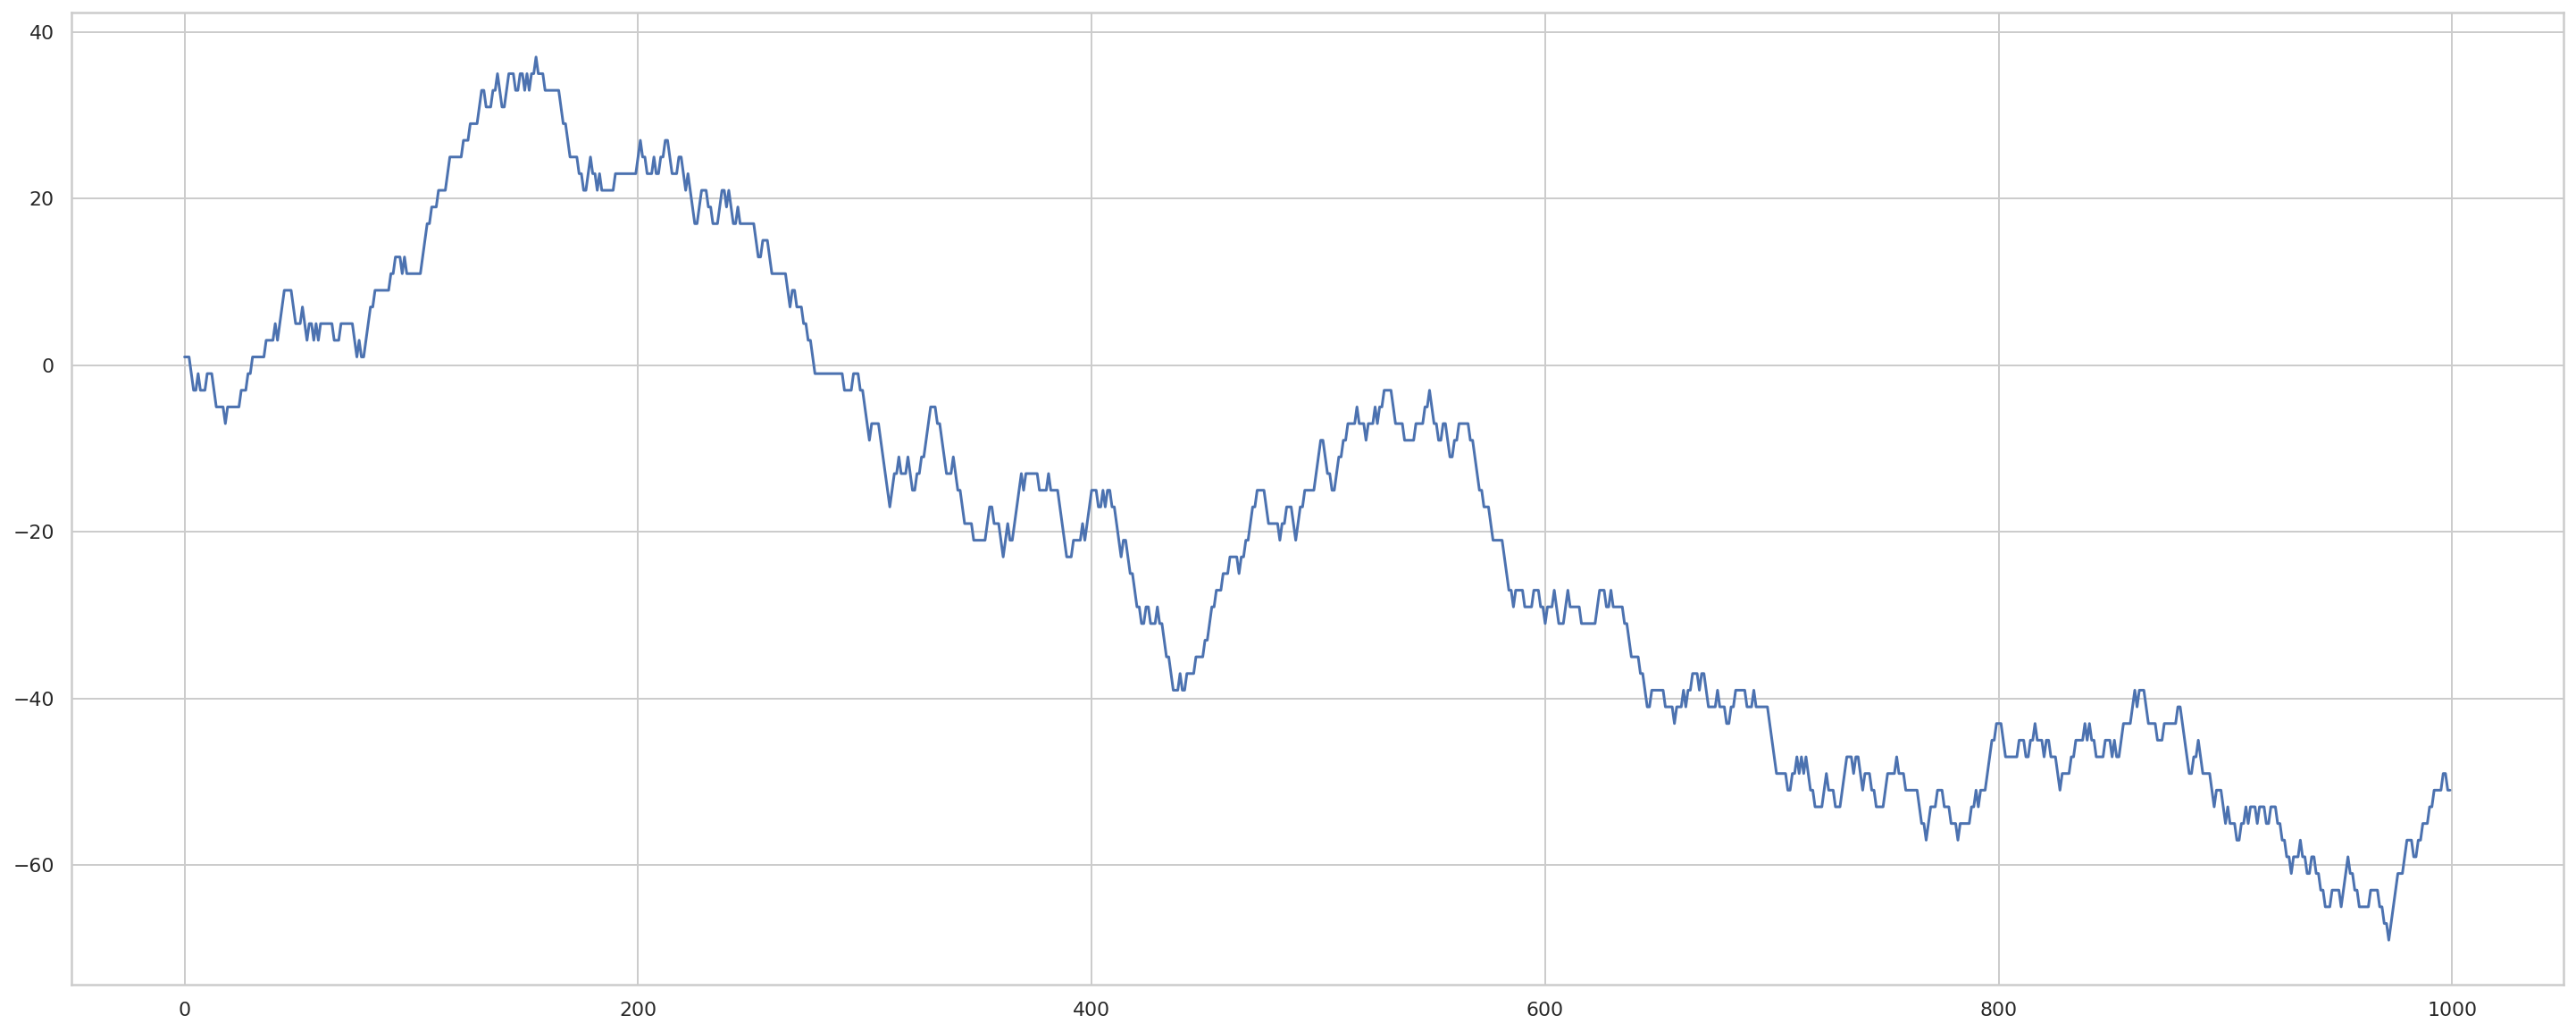

In [6]:
drift = [1 if random() > 0.5 else -1 for i in range(1000)] # drift could also be 0
noise = [1 if random() > 0.5 else -1 for i in range(1000)]

random_walk = list()
random_walk.append(1 if random() > 0.5 else -1) # initialize very first value

for i in range(1, 1000):
    random_walk.append(drift[i] + random_walk[i-1] + noise[i]) # using the formula from above

plt.plot(random_walk)

<br/>

<font color = 'darkorange' size = '5'>CHECK VISUALLY </font>

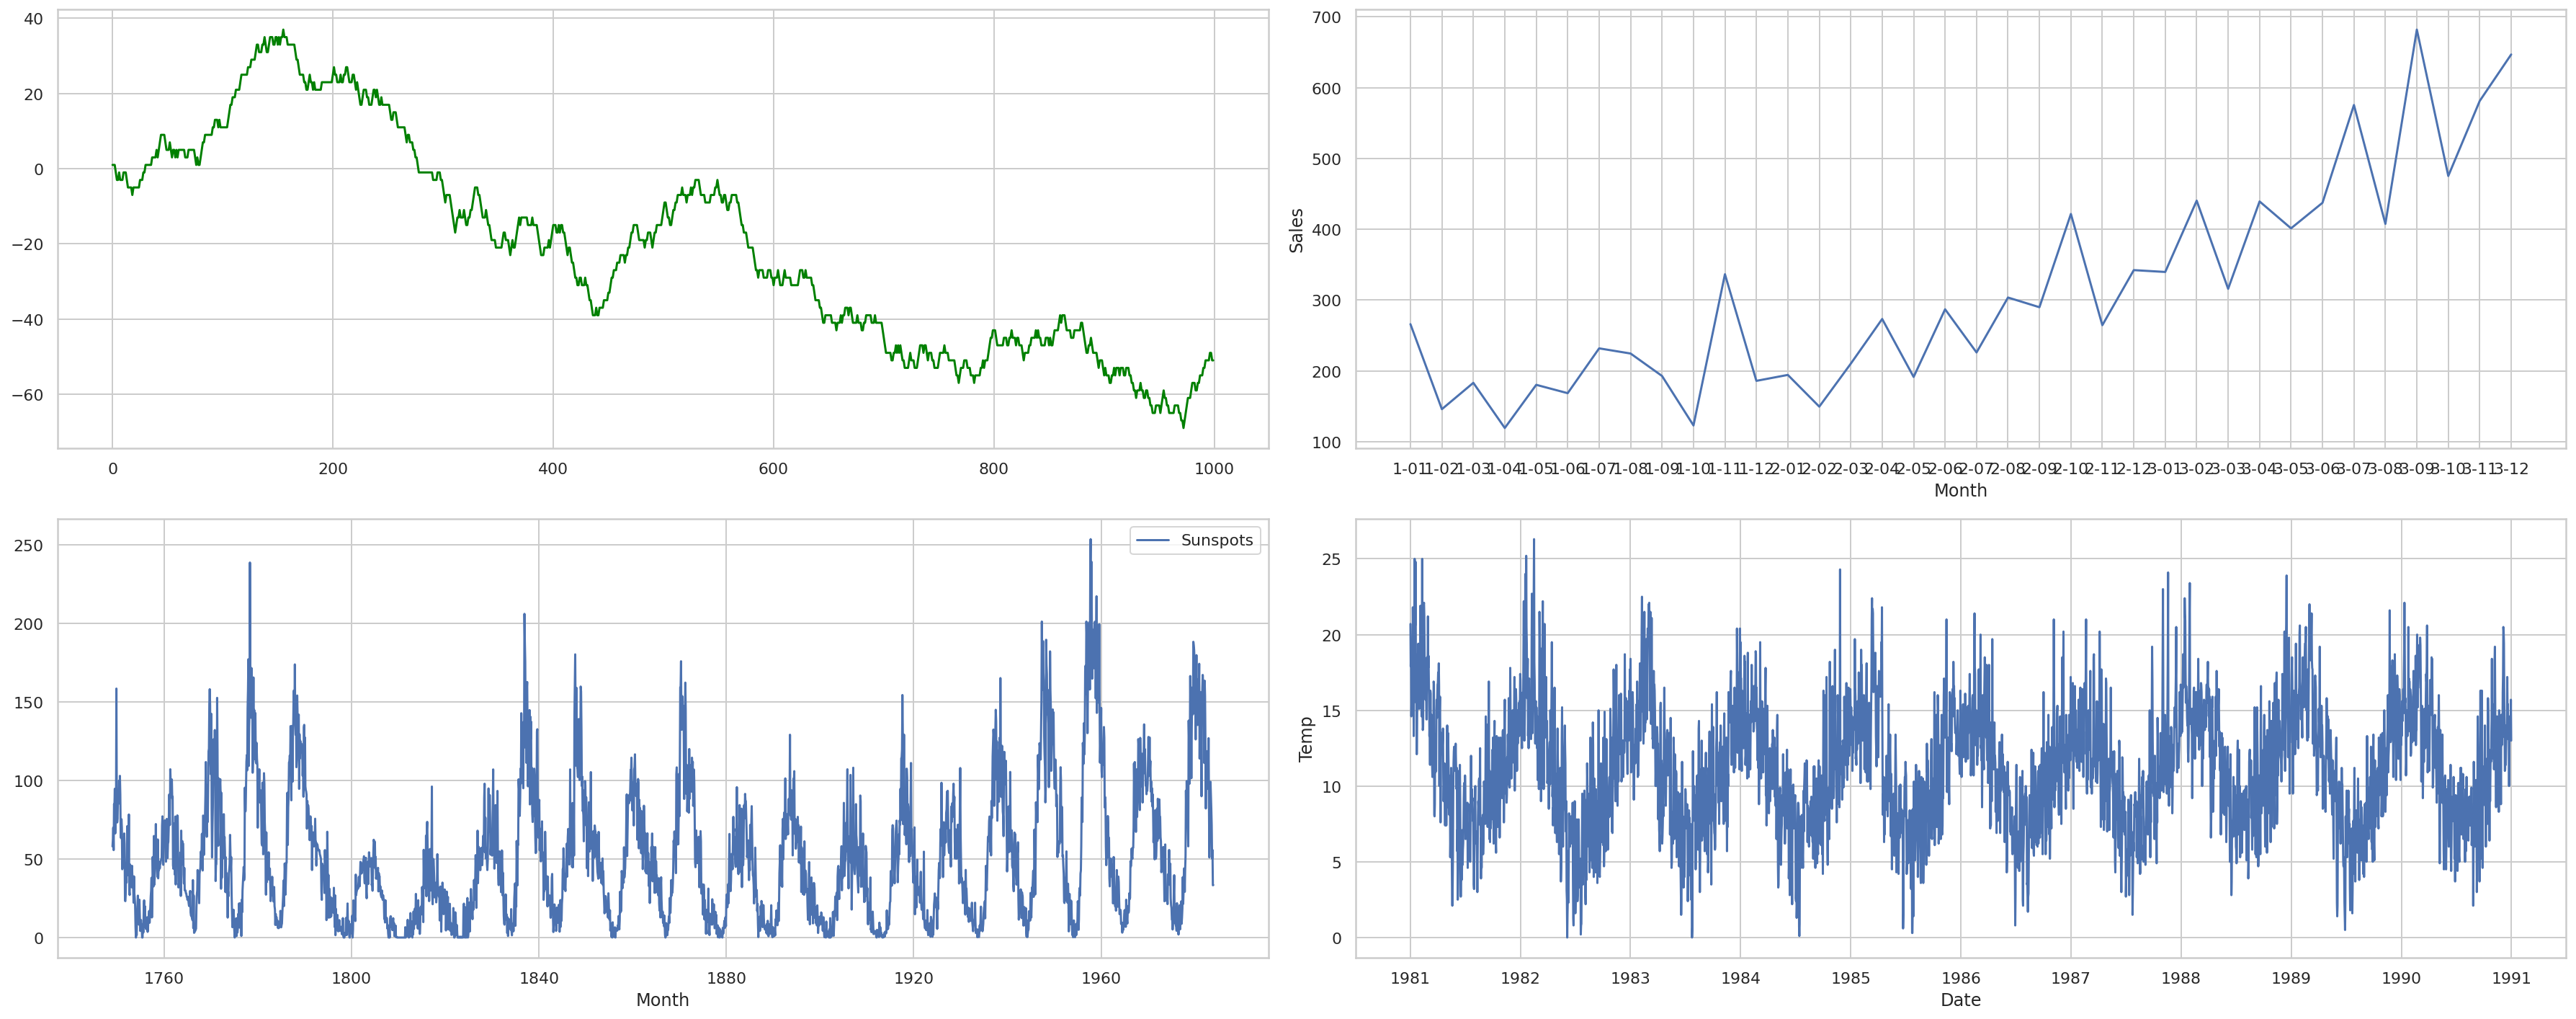

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25,10))

sns.lineplot(data= pd.Series(random_walk), ax= ax1, color = 'green');
sns.lineplot(data= shampoo_sales, ax= ax2); 
sns.lineplot(data= sunspots, ax= ax3);  
sns.lineplot(data= daily_temps, ax= ax4);  

plt.tight_layout()

### Autocorrelation

A correlogram of a RW will show strong correlation with the previous value (duh! it was used to generate the value) and a almost linear tapering off with previous lag values.   
The first 60 lags show statistically significant autocorrelations, so may be we need a few additional tests to test if our TS is a RW. 

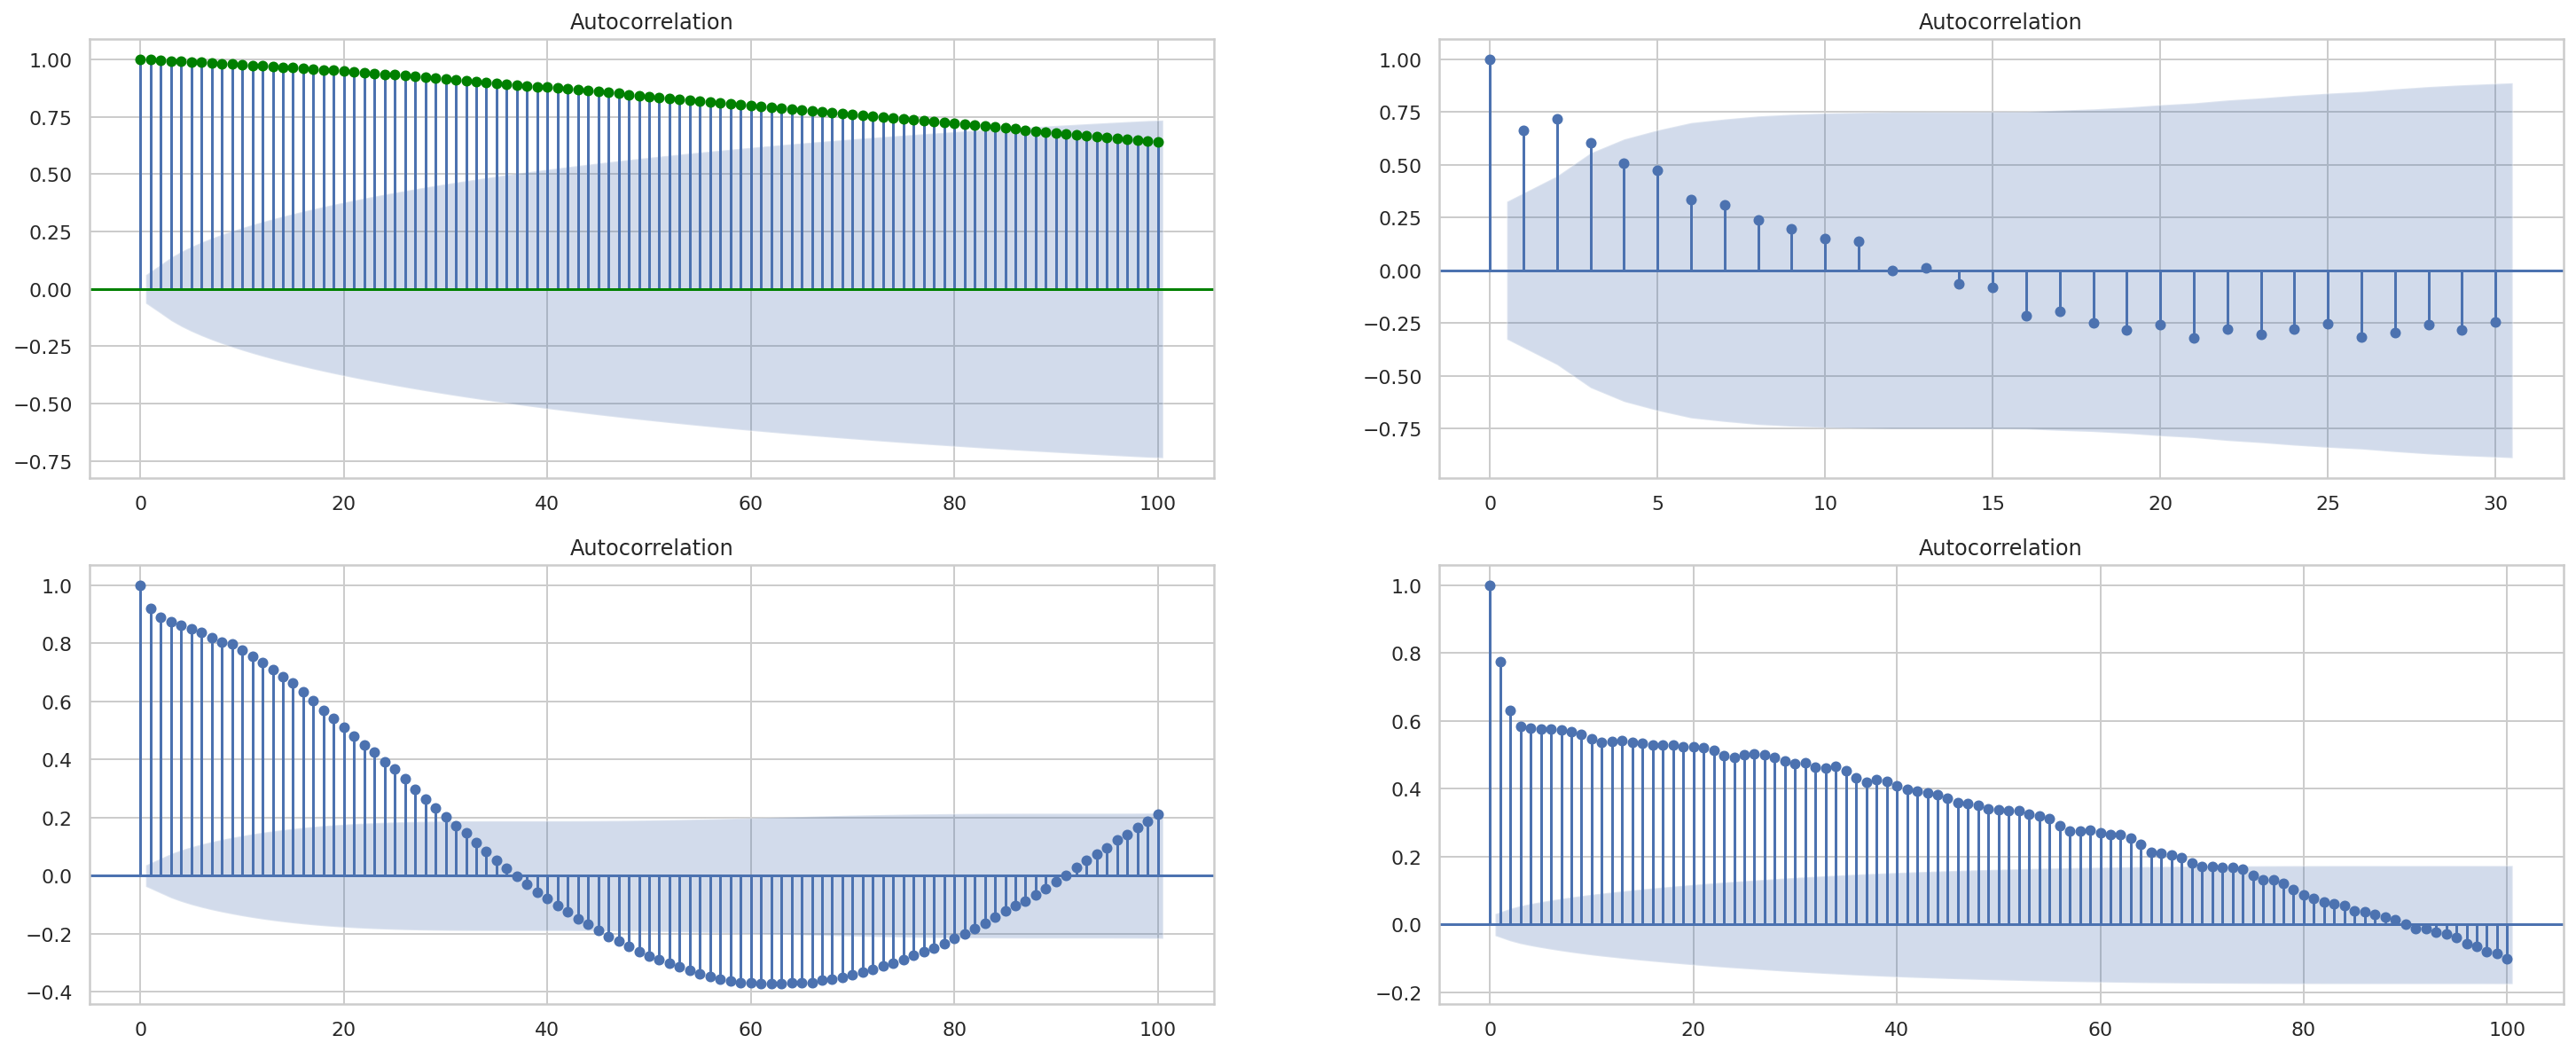

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25,10))

sm.graphics.tsa.plot_acf(pd.Series(random_walk), lags=100, ax = ax1, color='green'); 
sm.graphics.tsa.plot_acf(shampoo_sales, lags=30, ax = ax2); 
sm.graphics.tsa.plot_acf(sunspots, lags=100, ax = ax3); 
sm.graphics.tsa.plot_acf(daily_temps, lags=100, ax = ax4); 
plt.show()

### Test if the First order difference of ur Time Series is white noise 

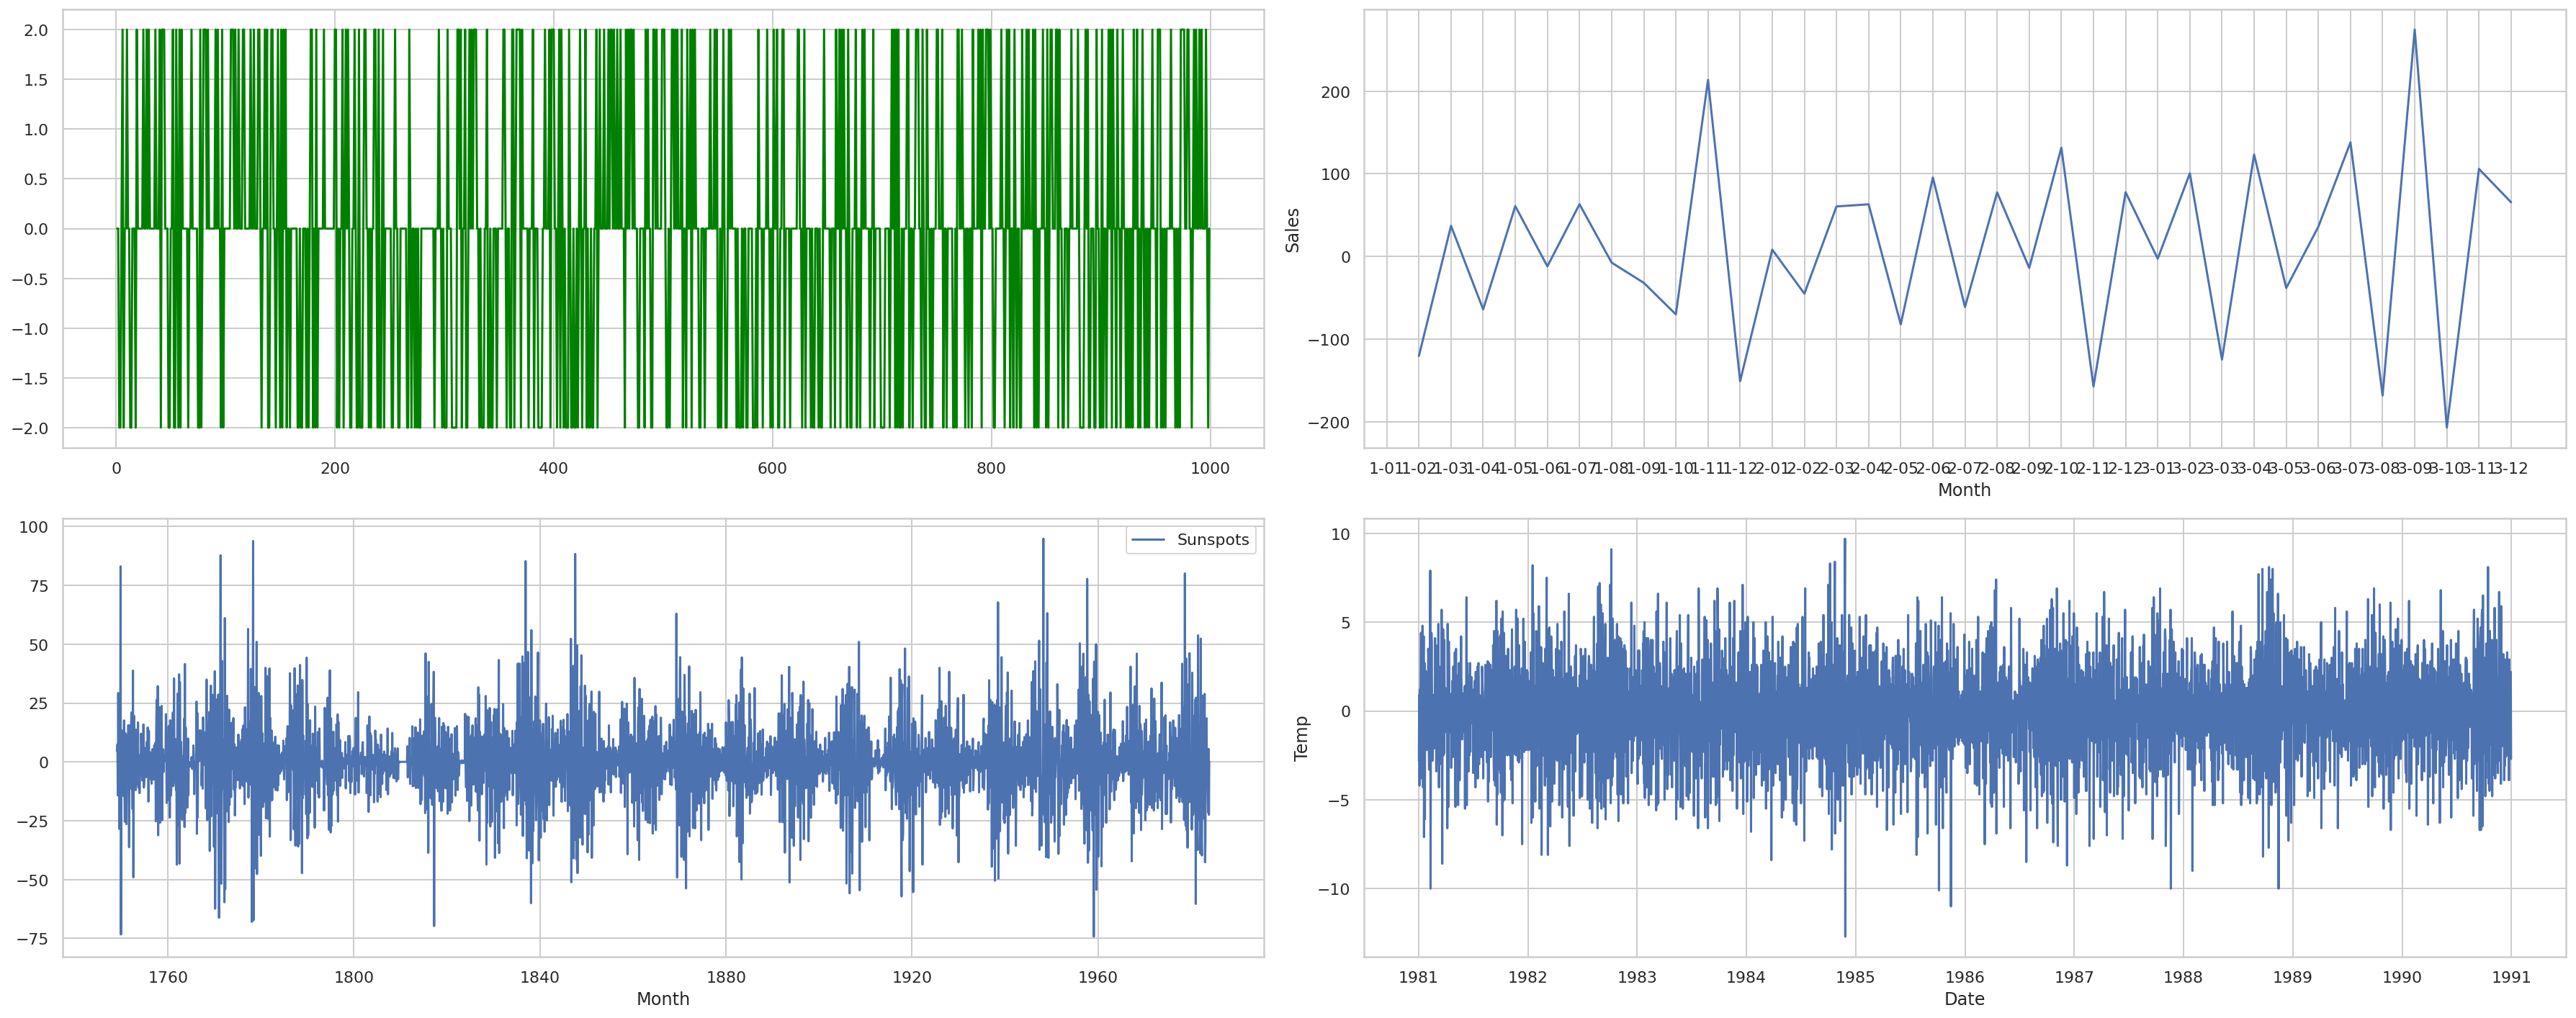

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25,10))

sns.lineplot(data= pd.Series(random_walk).diff(), ax= ax1, color = 'green');
sns.lineplot(data= shampoo_sales.diff(), ax= ax2); 
sns.lineplot(data= sunspots.diff(), ax= ax3);  
sns.lineplot(data= daily_temps.diff(), ax= ax4);  

plt.tight_layout()

### Test it statistically as well

Use the ADF, Augmented Dickey Fuller test. 
* it regresses the difference in values on the previous value

<font size = 5 > $X_{t}$ - $X_{t - 1}$  = $B_{0}$ + $B_{1}$ * $X_{t - 1}$ + $e_{t}$  </font>

<font size = 3 > $H_{0}$ : The TS is a random walk, slope $B_{1}$ = 0 </font>   
<font size = 3 > $H_{A}$ : The TS is not a random walk, slope $B_{1}$ != 0 </font> 

In [10]:
test_results = adfuller(pd.Series(random_walk))

print(f'ADF test statistic : {test_results[0]}')
print(f'pValue : {test_results[1]}')
print(f'Critical values : {test_results[4]}')

ADF test statistic : -0.6757770567698529
pValue : 0.8529244617064677
Critical values : {'1%': -3.4369259442540416, '5%': -2.8644432969122833, '10%': -2.5683158550174094}


<font color = 'purple' size ='5'> NOTE : Large pvalue means we fail to reject the Ho and it means the TS is a random walk.</font> 

In [11]:
test_results_temp = adfuller(pd.Series(daily_temps))

print(f'ADF test statistic : {test_results_temp[0]}')
print(f'pValue : {test_results_temp[1]}')
print(f'Critical values : {test_results_temp[4]}')

ADF test statistic : -4.4448049246116845
pValue : 0.0002470826300361149
Critical values : {'1%': -3.4321532327220154, '5%': -2.862336767636517, '10%': -2.56719413172842}


<font color = 'purple' size ='5' > NOTE : Very small pvalue means we reject the Ho.  
It means the TS is NOT a random walk, with a very low likelihood that this result had occured by chance, or is a statistical fluke. </font>  